## Used Car Prediction in India :

## Importing the libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Vishal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the dataset :

In [2]:
d_train = pd.read_excel('Data_Train.xlsx')

d_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
# Check the column Datatype :

d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


## Train Dataset :

In [4]:
# Rename the column name for better readability

d_train = d_train.rename(columns={'Name':'Car_Name','New_Price':'NewCar_Price',
                                 'Price':'UsedCar_Price'})
d_train.head()

,Car_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,NewCar_Price,UsedCar_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
d_train.shape

(6019, 13)

In [6]:
# According to Fuel_type, used car price statistics :

d_train.groupby('Fuel_Type')['UsedCar_Price'].describe().reset_index()

,Fuel_Type,count,mean,std,min,25%,50%,75%,max
0,CNG,56.0,3.516786,1.434187,1.20,2.8500,3.250,3.8225,8.35
1,Diesel,3205.0,12.840605,12.808922,0.60,4.8500,7.750,16.5000,160.00
2,Electric,2.0,12.875000,0.176777,12.75,12.8125,12.875,12.9375,13.00
3,LPG,10.0,2.487000,0.648606,1.45,2.0300,2.600,3.0375,3.20
4,Petrol,2746.0,5.701100,7.381482,0.44,2.7425,4.105,6.1575,120.00


- $My-Observation$ 

- According to Fuel_Type, the count of Diesel cars and their respected prices are high.
- As compare to LPG, the Electric cars having high price of used cars.
- Mostly people prefer Diesel and Petrol cars rather than CNG, LPG, Electric.

,Year,Kilometers_Driven,Seats,UsedCar_Price
Year,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493
Seats,0.012333,0.083113,1.000000,0.052225
UsedCar_Price,0.305327,-0.011493,0.052225,1.000000


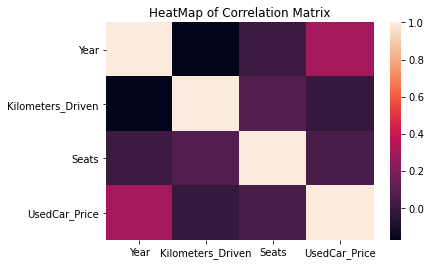

In [7]:
# Find the correlation between numerical column :

dt_corr = d_train.corr()

sns.heatmap(dt_corr, 
            xticklabels=dt_corr.columns.values,
            yticklabels=dt_corr.columns.values)
plt.title('HeatMap of Correlation Matrix')
dt_corr

In [8]:
# According to Owner_type, used car price statistics :


d_train.groupby('Owner_Type')['UsedCar_Price'].describe().reset_index()

,Owner_Type,count,mean,std,min,25%,50%,75%,max
0,First,4929.0,9.962445,11.415998,0.50,3.75,5.91,10.50,160.0
1,Fourth & Above,9.0,3.280000,1.316378,1.97,2.20,3.00,4.00,5.5
2,Second,968.0,7.599886,9.515689,0.44,2.45,4.27,8.25,90.0
3,Third,113.0,5.007257,12.055917,0.45,1.30,2.65,4.20,120.0


- $My-Observation$ 

- In this dataset, the First owner cars has more number to be sold compare to Second, Third, Fourth & Above owner type
- There is inverse correlation between Owners and its Used Car Price. Average price of used cars has been decreases as owner type increases.


In [9]:
# According to Transmission, used car price statistics :

d_train.groupby('Transmission')['UsedCar_Price'].describe().reset_index()

,Transmission,count,mean,std,min,25%,50%,75%,max
0,Automatic,1720.0,19.843971,15.984578,1.50,7.9725,16.0,27.000,160.00
1,Manual,4299.0,5.332703,3.589005,0.44,3.0000,4.5,6.545,40.88


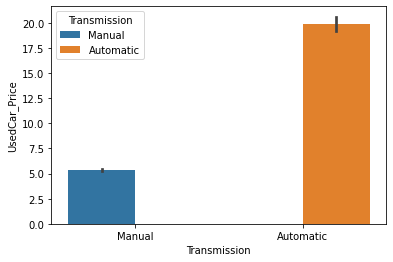

In [10]:
Tr_up = sns.barplot(x='Transmission', y='UsedCar_Price', hue='Transmission',
            data=d_train)
Tr_up

- $My-Observation$

- So, here we can say that Automatic cars are less than Manual cars but demand and price are high compare to Manual.

### Determining Target column distribution :

Text(0.5, 1.0, 'Skewness is: 0.7543716000992179\n, Kurtosis is: 0.31018039291429167')

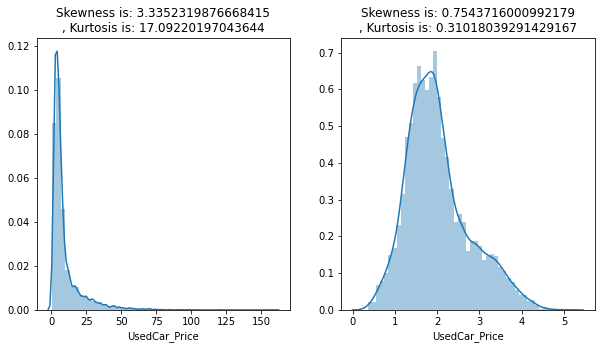

In [11]:
fig, ax= plt.subplots(1,2,figsize=(10,5))

sns.distplot(d_train.UsedCar_Price, kde=True, ax=ax[0])
d_train.UsedCar_Price.skew(), d_train.UsedCar_Price.kurt()
ax[0].set_title('Skewness is: %s\n, Kurtosis is: %s'%((d_train.UsedCar_Price).skew(), (d_train.UsedCar_Price).kurt()))

sns.distplot(np.log1p(d_train.UsedCar_Price), ax=ax[1])
plt.title('Skewness is: %s\n, Kurtosis is: %s'%(np.log1p(d_train.UsedCar_Price).skew(), np.log1p(d_train.UsedCar_Price).kurt()))

In [12]:
## Missing Values :

d_train.isnull().sum()

Car_Name                0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
NewCar_Price         5195
UsedCar_Price           0
dtype: int64

- here we can see that Mileage, Engine, Power, Seats, NewCar_Price having missing values or Null values.

In [13]:
# drop the NewCar_Price column because it has large number of missing data

New_d_train = d_train.drop(['NewCar_Price'], axis=1) 
New_d_train.head()

,Car_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,UsedCar_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [14]:
# Using ffill, fill the remaining missing values 

d_train_1 = New_d_train.fillna(method = 'ffill')
d_train_1.head()

,Car_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,UsedCar_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [15]:
d_train_1.isnull().sum()

Car_Name             0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
UsedCar_Price        0
dtype: int64

In [16]:
d_train_1.shape

(6019, 12)

In [17]:
d_train_1['Car_Name'].nunique()

1876

In [18]:
## Applying Label encoding :


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in d_train_1.columns:
    if d_train_1['Fuel_Type'].dtype == type(object):
        d_train_1['Fuel_Type'] = le.fit_transform(d_train_1['Fuel_Type'])

for column in d_train_1.columns:
    if d_train_1['Location'].dtype == type(object):
        d_train_1['Location'] = le.fit_transform(d_train_1['Location'])

for column in d_train_1.columns:
    if d_train_1['Transmission'].dtype == type(object):
        d_train_1['Transmission'] = le.fit_transform(d_train_1['Transmission'])

for column in d_train_1.columns:
    if d_train_1['Owner_Type'].dtype == type(object):
        d_train_1['Owner_Type'] = le.fit_transform(d_train_1['Owner_Type'])
        
# if need then do it with seats column also

# Removing unecessry prefix and sufix from columns:
d_train_1['Mileage'] = d_train_1.Mileage.str.extract(r'(\d*[.]*\d*)')
d_train_1['Engine'] = d_train_1.Engine.str.extract(r'(^\d*)')
d_train_1['Power'] = d_train_1.Power.str.extract(r'(^\d*[.]*\d*)')
        
d_train_1.head(10)

,Car_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,UsedCar_Price
0,Maruti Wagon R LXI CNG,9,2010,72000,0,1,0,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,1,0,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,2,2011,46000,4,1,0,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,0,2,15.2,1968,140.8,5.0,17.74
5,Hyundai EON LPG Era Plus Option,5,2012,75000,3,1,0,21.1,814,55.2,5.0,2.35
6,Nissan Micra Diesel XV,6,2013,86999,1,1,0,23.08,1461,63.1,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,9,2016,36000,1,0,0,11.36,2755,171.5,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,10,2013,64430,1,1,0,20.54,1598,103.6,5.0,5.20
9,Tata Indica Vista Quadrajet LS,2,2012,65932,1,1,2,22.3,1248,74,5.0,1.95


In [19]:
d_train_1['Mileage'] = d_train_1['Mileage'].astype(float)
d_train_1['Engine'] = d_train_1['Engine'].astype(float)
#d_train_1['Power'] = d_train_1['Power'].astype()

d_train_1['Power'] = pd.to_numeric(d_train_1['Power'])
d_train_1['Power'].head()

0     58.16
1    126.20
2     88.70
3     88.76
4    140.80
Name: Power, dtype: float64

In [20]:
d_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_Name           6019 non-null   object 
 1   Location           6019 non-null   int32  
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   int32  
 5   Transmission       6019 non-null   int32  
 6   Owner_Type         6019 non-null   int32  
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              5911 non-null   float64
 10  Seats              6019 non-null   float64
 11  UsedCar_Price      6019 non-null   float64
dtypes: float64(5), int32(4), int64(2), object(1)
memory usage: 470.4+ KB


In [21]:
d_train_1.isnull().sum()

Car_Name               0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                108
Seats                  0
UsedCar_Price          0
dtype: int64

In [22]:
#d_train_1['Power'].replace('','nan', inplace=True)
d_train_1['Power'] = d_train_1['Power'].fillna(method = 'ffill')
d_train_1['Power'].head()

0     58.16
1    126.20
2     88.70
3     88.76
4    140.80
Name: Power, dtype: float64

In [23]:
d_train_1.isnull().sum()

Car_Name             0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
UsedCar_Price        0
dtype: int64

In [24]:
d_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_Name           6019 non-null   object 
 1   Location           6019 non-null   int32  
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   int32  
 5   Transmission       6019 non-null   int32  
 6   Owner_Type         6019 non-null   int32  
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  UsedCar_Price      6019 non-null   float64
dtypes: float64(5), int32(4), int64(2), object(1)
memory usage: 470.4+ KB


In [25]:
d_train_1.tail()

,Car_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,UsedCar_Price
6014,Maruti Swift VDI,4,2014,27365,1,1,0,28.40,1248.0,74.0,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,6,2015,100000,1,1,0,24.40,1120.0,71.0,5.0,4.00
6016,Mahindra Xylo D4 BSIV,6,2012,55000,1,1,2,14.00,2498.0,112.0,8.0,2.90
6017,Maruti Wagon R VXI,8,2013,46000,4,1,0,18.90,998.0,67.1,5.0,2.65
6018,Chevrolet Beat Diesel,5,2011,47000,1,1,0,25.44,936.0,57.6,5.0,2.50


### Using SweetViz Analysis :
- Sweetviz is an open source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with a single line of code. Output is a fully self-contained HTML application.

- The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

In [26]:
import sweetviz 

In [27]:
my_report = sweetviz.analyze([d_train_1, 'Train'], target_feat = 'UsedCar_Price')

:FEATURES DONE:                    |█████████████████████| [100%]   00:11  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [28]:
my_report.show_html('d_train_1.html')        # it will open new page on browser to show analysis

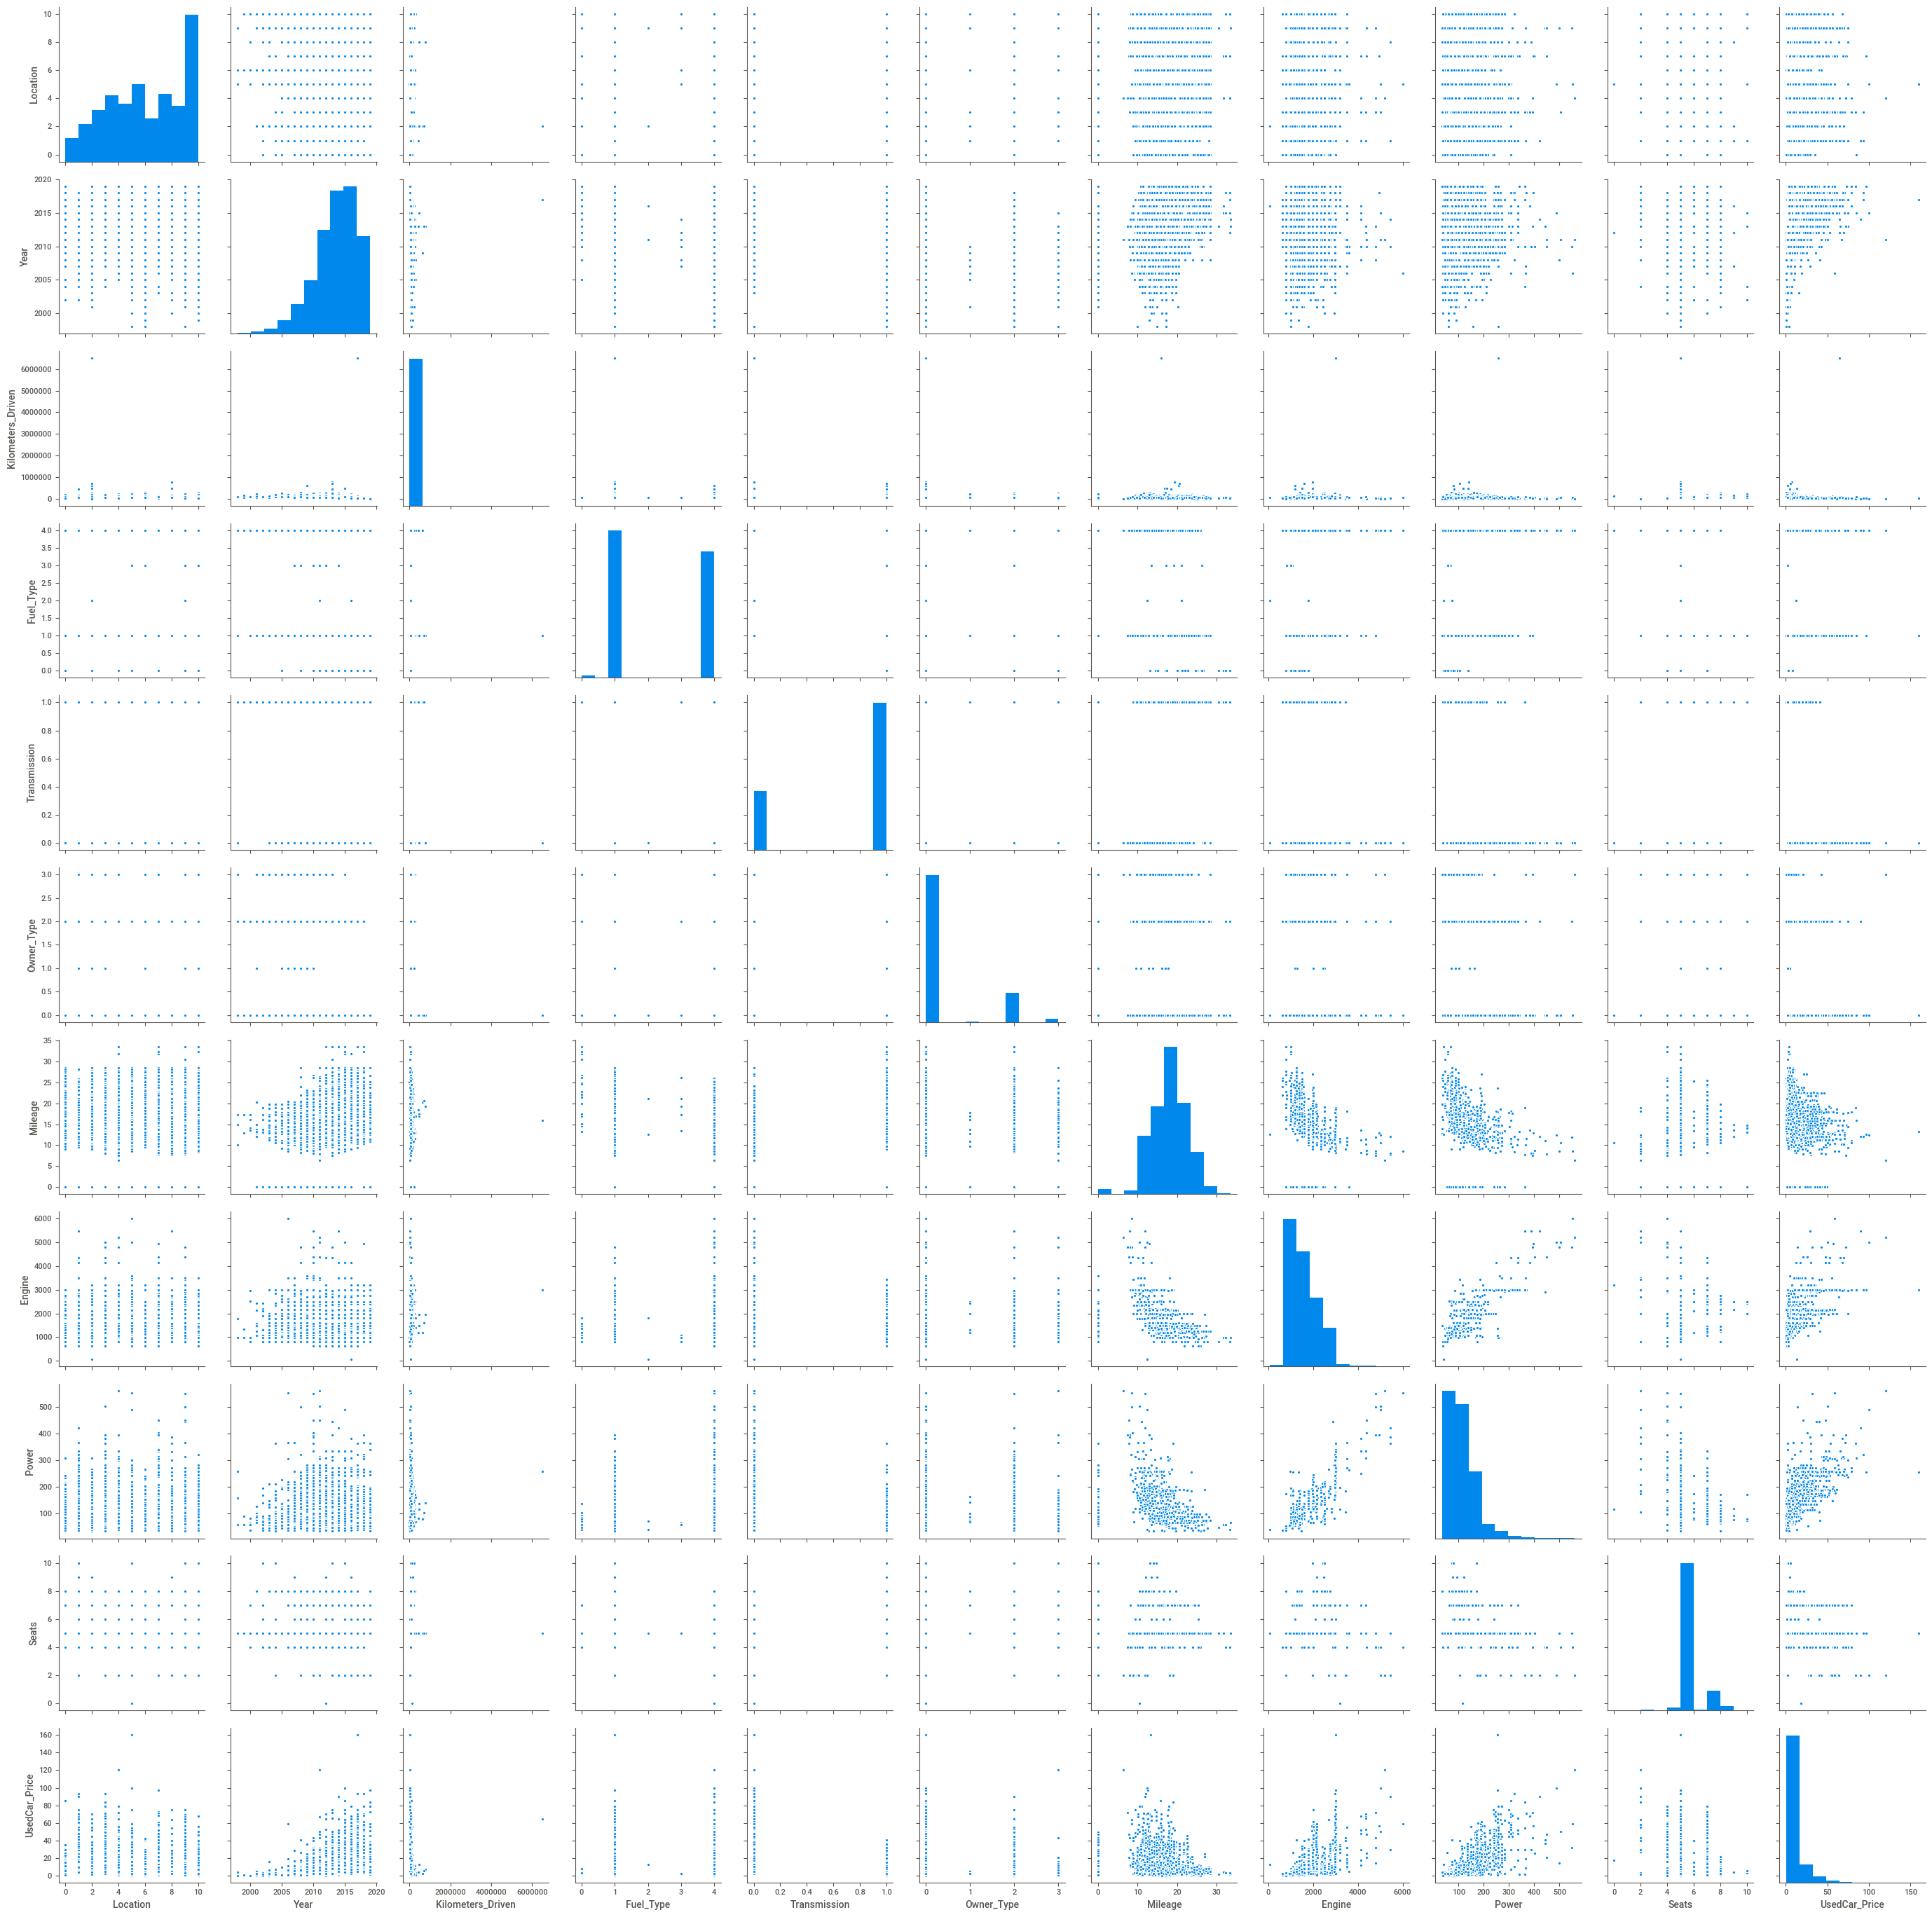

In [29]:
# overall dataset distribution :

sns.pairplot(d_train_1)

## Test Dataset :

In [30]:
d_test = pd.read_excel('Data_Test.xlsx')
d_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [31]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [32]:
# Rename column here also

d_test = d_test.rename(columns={'Name':'Car_Name','New_Price':'NewCar_Price'})
d_test.head()

,Car_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,NewCar_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [33]:
d_test.shape

(1234, 12)

In [34]:
d_test.isnull().sum()

Car_Name                0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
NewCar_Price         1052
dtype: int64

In [35]:
d_test.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [36]:
# drop the NewCar_Price column because it has large number of missing data and according to me it is not useful for prediction

New_d_test = d_test.drop(['NewCar_Price'], axis=1) 
New_d_test.head()

,Car_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [37]:
# Using ffill, fill the remaining missing values 

d_test_1 = New_d_test.fillna(method = 'ffill')
d_test_1.head()

,Car_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [38]:
d_test_1.isnull().sum()

Car_Name             0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [39]:
## Applying Label encoding :


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in d_test_1.columns:
    if d_test_1['Fuel_Type'].dtype == type(object):
        d_test_1['Fuel_Type'] = le.fit_transform(d_test_1['Fuel_Type'])

for column in d_test_1.columns:
    if d_test_1['Location'].dtype == type(object):
        d_test_1['Location'] = le.fit_transform(d_test_1['Location'])

for column in d_test_1.columns:
    if d_test_1['Transmission'].dtype == type(object):
        d_test_1['Transmission'] = le.fit_transform(d_test_1['Transmission'])

for column in d_test_1.columns:
    if d_test_1['Owner_Type'].dtype == type(object):
        d_test_1['Owner_Type'] = le.fit_transform(d_test_1['Owner_Type'])
        
# if need then do it with seats column also

# Removing unecessry prefix and sufix from columns:
d_test_1['Mileage'] = d_test_1.Mileage.str.extract(r'(\d*[.]*\d*)')
d_test_1['Engine'] = d_test_1.Engine.str.extract(r'(^\d*)')
d_test_1['Power'] = d_test_1.Power.str.extract(r'(^\d*[.]*\d*)')
        
d_test_1.head(10)

,Car_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,4,2014,40929,0,1,0,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,3,2013,54493,3,1,2,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,9,2017,34000,1,1,0,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,5,2012,139000,1,1,0,23.59,1364,,5.0
4,Hyundai i20 Magna,9,2014,29000,3,1,0,18.5,1197,82.85,5.0
5,Mahindra XUV500 W8 2WD,3,2016,85609,1,1,2,16.0,2179,140,7.0
6,Toyota Fortuner 4x2 AT TRD Sportivo,10,2015,59000,1,0,0,12.55,2982,168.7,7.0
7,Hyundai EON Era Plus,6,2013,65000,3,1,0,21.1,814,55.2,5.0
8,Honda City 1.5 S MT,9,2011,66000,3,1,2,17.0,1497,118,5.0
9,Mahindra XUV500 W6 2WD,3,2015,54684,1,1,0,15.1,2179,140,7.0


In [40]:
d_test_1['Power'] = pd.to_numeric(d_test_1['Power'])
d_test_1['Power'].head()

0     58.20
1     47.30
2    147.80
3       NaN
4     82.85
Name: Power, dtype: float64

In [41]:
d_test_1.isnull().sum()

Car_Name              0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                22
Seats                 0
dtype: int64

In [42]:
d_test_1['Mileage'] = d_test_1['Mileage'].astype(float)
d_test_1['Engine'] = d_test_1['Engine'].astype(float)
#d_test_1['Power'] = d_train_1['Power'].astype()

d_test_1['Power'] = pd.to_numeric(d_test_1['Power'])
d_test_1['Power'].head()

0     58.20
1     47.30
2    147.80
3       NaN
4     82.85
Name: Power, dtype: float64

In [43]:
d_test_1['Power'] = d_test_1['Power'].fillna(method = 'ffill')
d_test_1['Power'].head()

0     58.20
1     47.30
2    147.80
3    147.80
4     82.85
Name: Power, dtype: float64

In [44]:
d_test_1.isnull().sum()

Car_Name             0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [45]:
d_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_Name           1234 non-null   object 
 1   Location           1234 non-null   int32  
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   int32  
 5   Transmission       1234 non-null   int32  
 6   Owner_Type         1234 non-null   int32  
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
dtypes: float64(4), int32(4), int64(2), object(1)
memory usage: 86.9+ KB


In [46]:
d_test_1.head()

,Car_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0
3,Toyota Etios Liva GD,5,2012,139000,1,1,0,23.59,1364.0,147.80,5.0
4,Hyundai i20 Magna,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0


In [47]:
d_test_1.shape

(1234, 11)

- -------x----------x-----------x------------x-------------x----------------x-------------------x-------------------x

### Spliting the dataset into "Train set" and use it for model :

In [48]:
# Train dataset :
X = d_train_1.iloc[:, 1:-1].values

#X = d_test_1.iloc[:, 1:].values

y = d_train_1.iloc[:,-1].values


### Linear Regression :


In [49]:
# split into train and test 
from sklearn.model_selection import train_test_split

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0)

In [50]:
y_test_lr.shape , X_test_lr.shape

((1204,), (1204, 10))

In [51]:
# Train the linear regression model on the Training set

from sklearn.linear_model import LinearRegression
regressor_LR = LinearRegression()
regressor_LR.fit(X_train_lr, y_train_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
### prediction on train dataset:

y_pred_lr = regressor_LR.predict(X_test_lr)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr),1), y_test_lr.reshape(len(y_test_lr),1)),1))

In [53]:
from sklearn.metrics import r2_score
print('R-sqr score :',r2_score(y_test_lr, y_pred_lr)*100)

R-sqr score : 70.16131904322889


Text(0.5, 1.0, 'Residual plot')

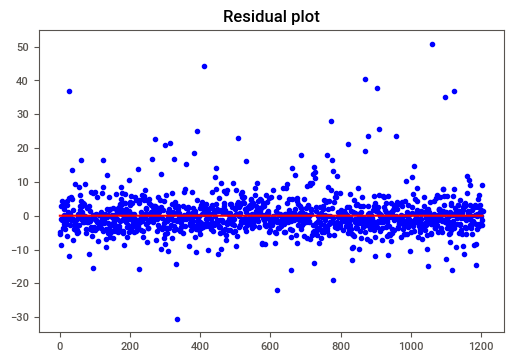

In [54]:
x = [i for i in range(1, len(y_pred_lr)+1)]
x_plot = plt.scatter(x,(y_test_lr - y_pred_lr), c='b')
plt.plot(x,[0]*len(y_pred_lr), c='r')
plt.title('Residual plot')

### Decision Tree Regression model :

In [55]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0)

In [56]:
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor(random_state = 0)
regressor_DT.fit(X_train_dt, y_train_dt)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [57]:
y_pred_dt = regressor_DT.predict(X_test_dt)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_dt.reshape(len(y_pred_dt),1), y_test_dt.reshape(len(y_test_dt),1)),1))

[[7.77 7.25]
 [3.5  4.25]
 [4.5  3.9 ]
 ...
 [6.37 8.5 ]
 [5.7  6.25]
 [4.26 3.87]]


In [58]:
from sklearn.metrics import r2_score
print('R-sqr score :',r2_score(y_test_dt, y_pred_dt)*100)

R-sqr score : 78.30165823956537


### Random Forest :


In [59]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = 0.205, 
                                                                random_state = 0)

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_RF.fit(X_train_rf, y_train_rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [61]:
y_pred_rf = regressor_RF.predict(X_test_rf)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test_rf.reshape(len(y_test_rf),1)),1))

[[7.99 7.25]
 [4.46 4.25]
 [3.72 3.9 ]
 ...
 [3.07 4.52]
 [3.14 3.7 ]
 [5.56 5.96]]


In [62]:
from sklearn.metrics import r2_score, mean_squared_error

print('RMSE :',np.sqrt(mean_squared_error(y_test_rf, y_pred_rf)))

print('R-sqr score :',r2_score(y_test_rf, y_pred_rf)*100)

RMSE : 3.6451147949278457
R-sqr score : 88.7525356814163


#### Residual plot for Random-Forest :

Text(0.5, 1.0, 'Residual plot')

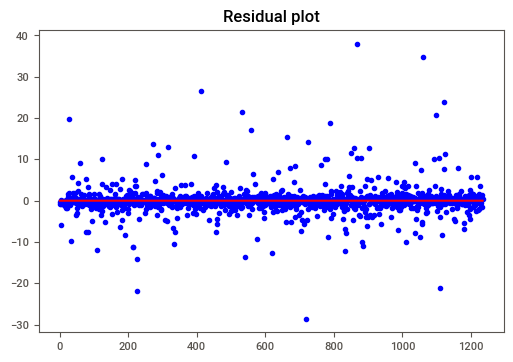

In [63]:
x = [i for i in range(1, len(y_pred_rf)+1)]
x_plot = plt.scatter(x,(y_test_rf - y_pred_rf), c='b')
plt.plot(x,[0]*len(y_pred_rf), c='r')
plt.title('Residual plot')

### Predict the "Test set" with the model :

In [64]:
# Test dataset :
test_data = d_test_1.iloc[:, 1:].values

In [65]:
# sample test result :
sample_result = pd.read_excel('Sample_submission.xlsx')
sample_result.head()

,Price
0,55.02
1,56.46
2,34.61
3,16.89
4,50.48


In [66]:
sample_result.shape, test_data.shape

((1234, 1), (1234, 10))

### Here we use Random Forest for the testing the test dataset :

- We use Random Forest because it has $R-sqr score : 88.752$, which is more than Linear Regression and Decision-tree Regression model ..

In [67]:
y_pred_rf_test = regressor_RF.predict(test_data)

In [68]:
sample_result.shape, y_pred_rf_test.shape

((1234, 1), (1234,))

### Check the sample test result with predicted result :

In [69]:
final_result = pd.DataFrame(np.concatenate((y_pred_rf.reshape(len(y_pred_rf_test),1), y_test_rf.reshape(len(sample_result),1)),1))
#final_result.rename(columns={'0':'Sample_Price','1':'Predicted_Price'})
final_result.columns

RangeIndex(start=0, stop=2, step=1)

In [70]:
final_result.tail()

,0,1
1229,17.862,16.25
1230,4.971,3.50
1231,3.074,4.52
1232,3.137,3.70
1233,5.556,5.96


- This Notebook was my first touch with machine learning. It was meant as a first hands on, instead of realizing the best model. But i think a score of 0.88 is not that bad at all. I've learned that the predictions of the training set are vague and cross validation is undispensable. Furthermore RandomForest seems to be a good choice for this dataset. Playing with a little bit more hyperparamters and better data cleaning should squeeze better results.